<h2><b> Dynamic Pricing </b>
<h5>
<b> Author: </b> Haikal Iman
<br> <b> Date: </b> 2024-February-20
<br> <b> Objective: </b> Car Services Dynamic Pricing demonstration for UTP's API building task.
<br> <b> Dataset: </b> Kaggle

#### Setup

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessors
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

# Learners
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Metrics
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Saver
import joblib
import pickle

In [2]:
# Randomness
np.random.seed(42)

#### EDA

##### Pre-analysis

In [3]:
# Load
df = pd.read_csv('dynamic__pricing.csv')
df

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


In [4]:
# Shape
df.shape

(1000, 10)

In [5]:
# Describe
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [6]:
# Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [7]:
# Unique
df.nunique()

Number_of_Riders             81
Number_of_Drivers            79
Location_Category             3
Customer_Loyalty_Status       3
Number_of_Past_Rides        101
Average_Ratings             151
Time_of_Booking               4
Vehicle_Type                  2
Expected_Ride_Duration      171
Historical_Cost_of_Ride    1000
dtype: int64

In [8]:
# Missing Values
df.isna().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

##### Analysis

In [9]:
# Numeric-Categorical Split
df_numerical = df.select_dtypes(include=['int', 'float'])
df_categorical = df.select_dtypes(include=['object'])

In [10]:
print("\n[Numerical]")
for col in df_numerical.columns:
    print(col)

print("\n[Categorical]")
for col in df_categorical.columns:
    print(col)


[Numerical]
Number_of_Riders
Number_of_Drivers
Number_of_Past_Rides
Average_Ratings
Expected_Ride_Duration
Historical_Cost_of_Ride

[Categorical]
Location_Category
Customer_Loyalty_Status
Time_of_Booking
Vehicle_Type


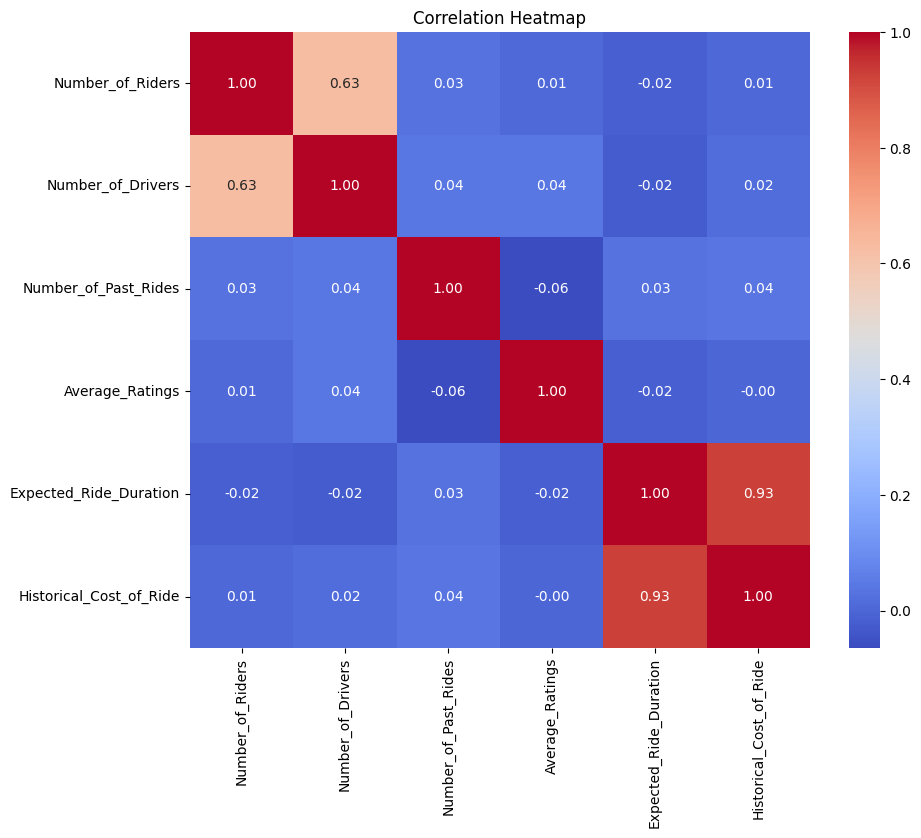

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

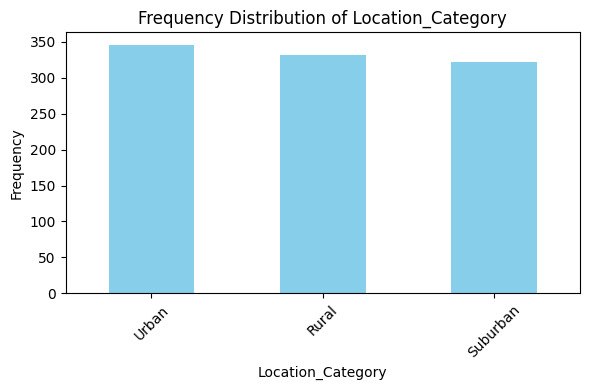

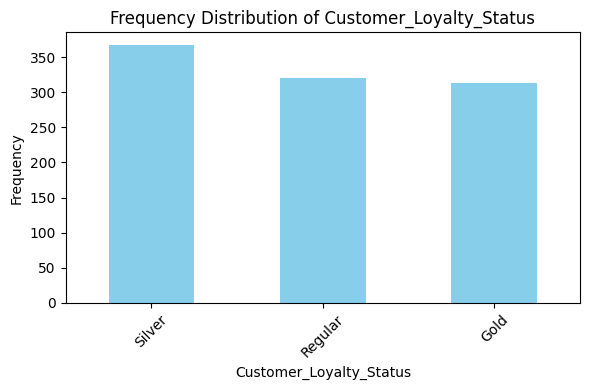

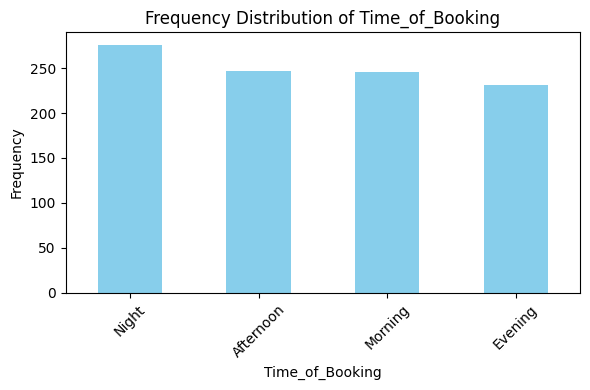

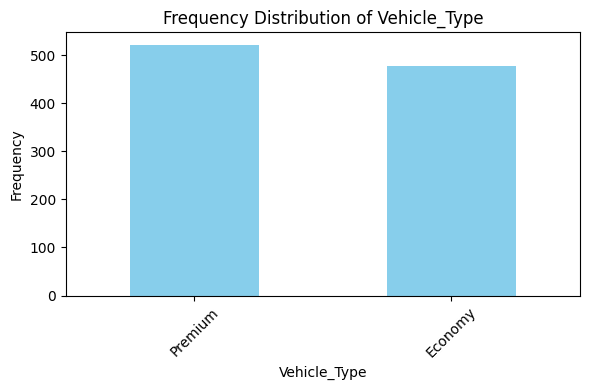

In [12]:
# Class Distributions
for col in df_categorical.columns:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

#### Preprocessing

In [13]:
# Feature-Label Split
X = df.drop('Historical_Cost_of_Ride', axis=1)
y = df['Historical_Cost_of_Ride']

In [14]:
# X
X

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration
0,90,45,Urban,Silver,13,4.47,Night,Premium,90
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149
...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58


In [15]:
# y
y

0      284.257273
1      173.874753
2      329.795469
3      470.201232
4      579.681422
          ...    
995     91.389526
996    424.155987
997    157.364830
998    279.095048
999    655.065106
Name: Historical_Cost_of_Ride, Length: 1000, dtype: float64

In [16]:
# One-Hot Encoding
X = pd.get_dummies(X, columns=['Location_Category','Customer_Loyalty_Status','Time_of_Booking','Vehicle_Type'], drop_first=True, dtype=int)
X

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,90,45,13,4.47,90,0,1,0,1,0,0,1,1
1,58,39,72,4.06,43,1,0,0,1,1,0,0,0
2,42,31,0,3.99,76,0,0,0,1,0,0,0,1
3,89,28,67,4.31,134,0,0,1,0,0,0,0,1
4,78,22,74,3.77,149,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,23,24,4.21,11,0,1,0,0,0,1,0,1
996,84,29,92,4.55,94,0,1,1,0,0,1,0,1
997,44,6,80,4.13,40,1,0,0,0,0,0,1,1
998,53,27,78,3.63,58,1,0,1,0,0,0,1,1


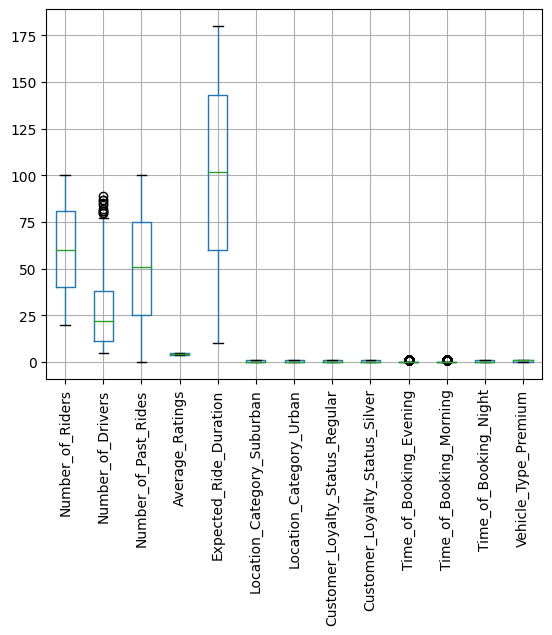

In [17]:
# Skewness
X.boxplot()
plt.xticks(rotation=90)
plt.show()

In [18]:
# Scaling
scaler = PowerTransformer(method='yeo-johnson')
X[['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides','Average_Ratings', 'Expected_Ride_Duration']] = scaler.fit_transform(X[['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides','Average_Ratings', 'Expected_Ride_Duration']])
X

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,1.216433,1.034958,-1.287323,0.478536,-0.154514,0,1,0,1,0,0,1,1
1,-0.044799,0.831266,0.765789,-0.464594,-1.146205,1,0,0,1,1,0,0,0
2,-0.742526,0.508750,-2.057274,-0.623114,-0.440395,0,0,0,1,0,0,0,1
3,1.179033,0.367520,0.619110,0.107545,0.709223,0,0,1,0,0,0,0,1
4,0.759975,0.037469,0.823655,-1.116417,0.994293,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.165135,0.097805,-0.820386,-0.122425,-1.911780,0,1,0,0,0,1,0,1
996,0.990344,0.416085,1.326408,0.665414,-0.073967,0,1,1,0,0,1,0,1
997,-0.651949,-1.602100,0.994696,-0.305335,-1.213390,1,0,0,0,0,0,1,1
998,-0.256722,0.317329,0.938095,-1.426390,-0.818754,1,0,1,0,0,0,1,1


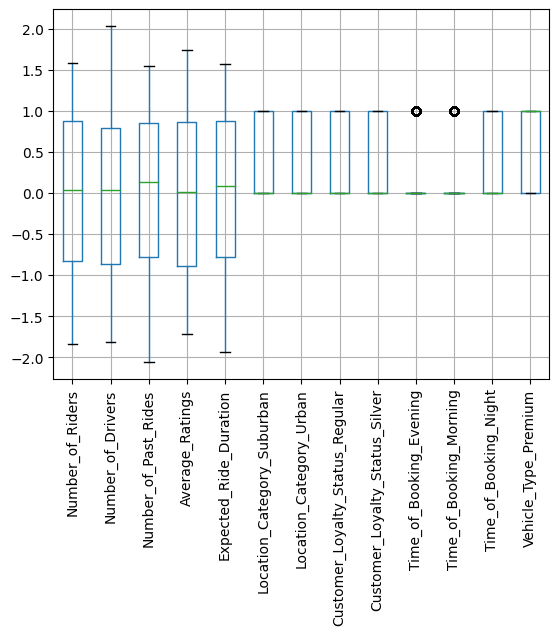

In [19]:
# Scaled Skewness
X.boxplot()
plt.xticks(rotation=90)
plt.show()

#### Modelling

In [20]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [21]:
# X_train
X_train

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
556,-1.213820,-0.760083,0.678137,-1.316043,-0.883238,0,1,0,1,0,1,0,0
957,-0.086789,-0.387686,-2.057274,-0.713361,-0.013860,0,1,1,0,0,0,0,0
577,0.643060,0.367520,-1.642238,-0.555268,1.405546,0,1,0,0,1,0,0,1
795,0.121319,1.034958,1.189766,1.112880,-1.682167,0,0,1,0,0,0,0,1
85,0.603817,0.637872,-1.065570,0.923855,0.823742,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.141523,1.349998,-1.382133,0.223081,-0.776013,0,0,1,0,0,0,0,0
270,1.216433,-0.657666,-0.820386,-1.205298,0.555447,1,0,1,0,0,0,0,0
860,-0.651949,-0.387686,-0.554650,-0.690822,0.478069,0,0,0,1,0,0,1,1
435,-1.213820,-0.870310,-0.591516,-1.645879,-1.396001,1,0,0,1,0,0,0,1


In [22]:
# y_train
y_train

556    162.283105
957    308.638555
577    575.011722
795    108.602356
85     454.492122
          ...    
106    221.157653
270    444.245302
860    395.378157
435    146.512774
102    501.262955
Name: Historical_Cost_of_Ride, Length: 200, dtype: float64

In [23]:
# Train Shape
print(X_train.shape)
print(y_train.shape)

(200, 13)
(200,)


In [24]:
# X_test
X_test

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
521,-0.927125,-1.263147,0.938095,-1.558277,0.322274,0,1,0,1,0,0,1,0
737,0.952256,-0.231934,-1.334210,1.685262,-0.337545,0,1,0,0,0,1,0,0
740,-1.725317,-1.422491,-1.196294,-1.645879,1.571683,0,1,0,0,1,0,0,1
660,-1.362299,-0.657666,-0.101126,0.061434,-0.215238,1,0,0,0,1,0,0,1
411,1.253725,-0.562005,-1.023330,1.207727,-1.706891,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,-1.312386,-0.657666,0.765789,-0.191128,0.302698,1,0,0,0,0,0,1,1
855,-0.562434,0.037469,1.460981,-1.689582,0.045999,0,0,1,0,0,1,0,0
803,0.603817,-0.091103,0.648684,0.223081,-1.396001,0,0,0,1,0,0,1,0
645,0.875719,-1.263147,0.938095,1.255233,0.842763,0,0,0,1,0,0,0,1


In [25]:
# y_test
y_test

521    470.269024
737    286.409294
740    552.269375
660    267.740417
411    111.112715
          ...    
619    352.935673
855    395.769847
803    119.594073
645    618.428857
846    312.173159
Name: Historical_Cost_of_Ride, Length: 800, dtype: float64

In [26]:
# Test Shape
print(X_test.shape)
print(y_test.shape)

(800, 13)
(800,)


In [27]:
# Moddels
models = {
    "Linear_Regression": {
        "Learner": LinearRegression(),
        "Results": {
            "Train R2-Score": None,
            "Train MAPE": None,
            "Test R2-Score": None,
            "Test MAPE": None
        },
        "Model_File_Joblib": None,
        "Model_File_Pickle": None
    },
    "Decision_Tree": {
        "Learner": DecisionTreeRegressor(),
        "Results": {
            "Train R2-Score": None,
            "Train MAPE": None,
            "Test R2-Score": None,
            "Test MAPE": None
        },
        "Model_File_Joblib": None,
        "Model_File_Pickle": None
    },
    "Random_Forest": {
        "Learner": RandomForestRegressor(),
        "Results": {
            "Train R2-Score": None,
            "Train MAPE": None,
            "Test R2-Score": None,
            "Test MAPE": None
        },
        "Model_File_Joblib": None,
        "Model_File_Pickle": None
    },
    "KNN": {
        "Learner": KNeighborsRegressor(),
        "Results": {
            "Train R2-Score": None,
            "Train MAPE": None,
            "Test R2-Score": None,
            "Test MAPE": None
        },
        "Model_File_Joblib": None,
        "Model_File_Pickle": None
    }
}

In [28]:
# Train-Test
dir_model_files = "model_files"
os.makedirs(dir_model_files, exist_ok=True)

for model, setup in models.items():
    learner = setup["Learner"]
    learner.fit(X_train, y_train)
    y_train_pred = learner.predict(X_train)
    y_test_pred = learner.predict(X_test)

    train_r2_score = r2_score(y_train, y_train_pred)
    test_r2_score = r2_score(y_test, y_test_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    # Save model in joblib format
    model_file_joblib = os.path.join(dir_model_files, f'{model}.joblib')  
    joblib.dump(learner, model_file_joblib)

    # Save model in pickle format
    model_file_pickle = os.path.join(dir_model_files, f'{model}.pkl')  
    with open(model_file_pickle, 'wb') as f:
        pickle.dump(learner, f)

    setup["Results"]["Train R2-Score"] = train_r2_score
    setup["Results"]["Test R2-Score"] = test_r2_score
    setup["Results"]["Train MAPE"] = train_mape
    setup["Results"]["Test MAPE"] = test_mape
    setup["Model_File_Joblib"] = model_file_joblib
    setup["Model_File_Pickle"] = model_file_pickle

    models[model] = setup

OSError: [Errno 28] No space left on device

#### Evaluation

In [ ]:
for model_name, setup in models.items():
    print(f"[Model: {model_name}]")
    print("Results:")
    for metric, value in setup["Results"].items():
        print(f"{metric}:\t{value}")
    print("Model File:\t", setup["Model_File_Joblib"])
    print("Model File:\t", setup["Model_File_Pickle"])
    print()

[Model: Linear_Regression]
Results:
Train R2-Score:	0.8873854701847628
Train MAPE:	0.14711208171983128
Test R2-Score:	0.8686273310559807
Test MAPE:	0.17039158604551588
Model File:	 model_files\Linear_Regression.joblib
Model File:	 model_files\Linear_Regression.pickle

[Model: Decision_Tree]
Results:
Train R2-Score:	1.0
Train MAPE:	0.0
Test R2-Score:	0.7300800950265812
Test MAPE:	0.22227425156565114
Model File:	 model_files\Decision_Tree.joblib
Model File:	 model_files\Decision_Tree.pickle

[Model: Random_Forest]
Results:
Train R2-Score:	0.97964285841987
Train MAPE:	0.05898704679825263
Test R2-Score:	0.8453883862972074
Test MAPE:	0.18297313820575895
Model File:	 model_files\Random_Forest.joblib
Model File:	 model_files\Random_Forest.pickle

[Model: KNN]
Results:
Train R2-Score:	0.8309860910073339
Train MAPE:	0.23533143193507264
Test R2-Score:	0.7266790027272564
Test MAPE:	0.32805292324391194
Model File:	 model_files\KNN.joblib
Model File:	 model_files\KNN.pickle



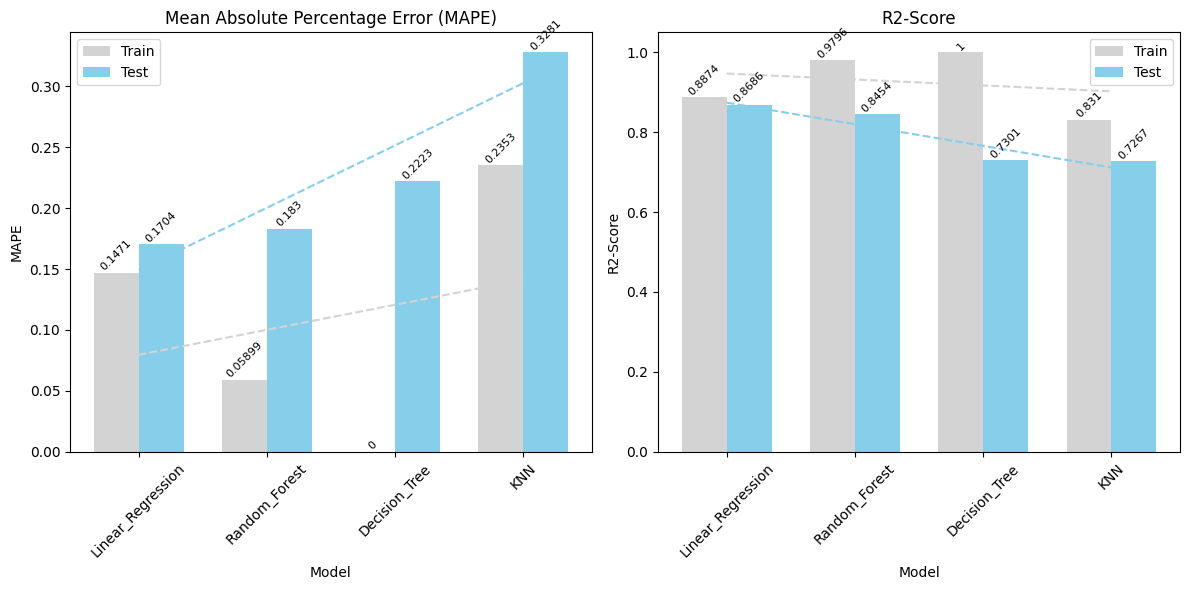

In [ ]:
# Bar Plots
# Convert results dictionary to a DataFrame for easier plotting
results_df = pd.DataFrame({model: setup["Results"] for model, setup in models.items()}).T

# Sort the DataFrame based on MAPE in ascending order and R2-Score in descending order
results_df_sorted_mape = results_df.sort_values(by='Test MAPE')
results_df_sorted_r2 = results_df.sort_values(by='Test R2-Score', ascending=False)

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(results_df))

# Define plotting function
def plot_metric(ax, data, train_col, test_col, ylabel, title, color_train, color_test):
    ax.bar(index - bar_width/2, data[train_col], bar_width, color=color_train, label='Train')
    ax.bar(index + bar_width/2, data[test_col], bar_width, color=color_test, label='Test')
    ax.set_title(title)
    ax.set_xlabel('Model')
    ax.set_ylabel(ylabel)
    ax.set_xticks(index)
    ax.set_xticklabels(data.index, rotation=45)
    ax.legend()

    # Adding annotations
    for i, (train_val, test_val) in enumerate(zip(data[train_col], data[test_col])):
        ax.text(i - bar_width/2, train_val, f'{train_val:.4g}', ha='center', va='bottom', fontsize=8, color='black', rotation=45)
        ax.text(i + bar_width/2, test_val, f'{test_val:.4g}', ha='center', va='bottom', fontsize=8, color='black', rotation=45)

    # Adding trend lines
    z_train = np.polyfit(index, data[train_col], 1)
    p_train = np.poly1d(z_train)
    ax.plot(index, p_train(index), '--', color=color_train)

    z_test = np.polyfit(index, data[test_col], 1)
    p_test = np.poly1d(z_test)
    ax.plot(index, p_test(index), '--', color=color_test)

# Plotting MAPE and R2-Score side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting MAPE sorted by ascending order
plot_metric(axs[0], results_df_sorted_mape, "Train MAPE", "Test MAPE", "MAPE", "Mean Absolute Percentage Error (MAPE)", 'lightgray', 'skyblue')

# Plotting R2-Score sorted by descending order
plot_metric(axs[1], results_df_sorted_r2, "Train R2-Score", "Test R2-Score", "R2-Score", "R2-Score", 'lightgray', 'skyblue')

plt.tight_layout()
plt.show()

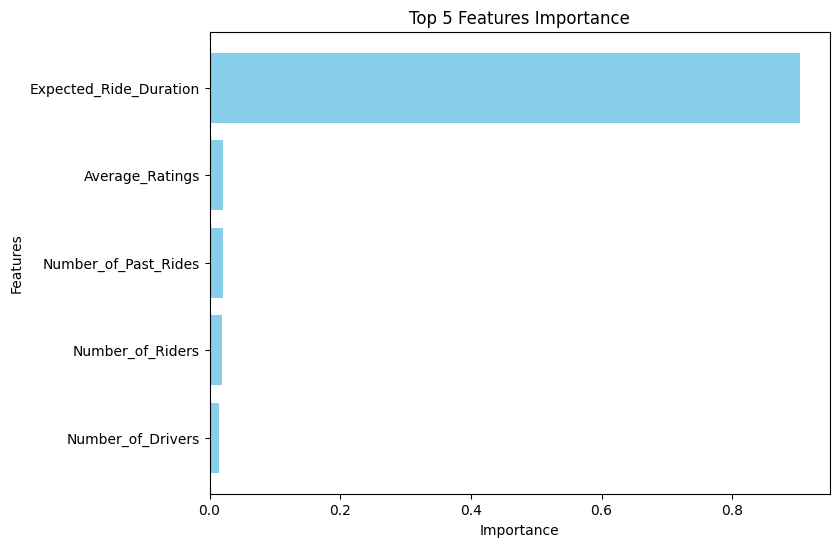

Top 5 Features:
['Number_of_Drivers', 'Number_of_Riders', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration']


In [ ]:
# Feature Importance
best_model = joblib.load(models["Random_Forest"]["Model_File_Pickle"])
X_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_model.feature_importances_})

# Get only the top 5 features and sort them by importance
top_5_features = X_importance.nlargest(5, 'Importance').sort_values(by='Importance', ascending=True)

# Plot feature importance for top 5 features
plt.figure(figsize=(8, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.title('Top 5 Features Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Print the list of top 5 features' names
print("Top 5 Features:")
print(top_5_features['Feature'].tolist())

<h5> *Linear_Regression produces a better result overall yet is comparable with Random_Forest. Since Random_Forest is an ensemble model and more robust, hence we chose Random_Forest as our best model for this demonstration.
<br> *There is one highly correlated feature within the dataset, but we chose to keep it as it is for this demonstration.
<br> *So, we will proceed to build an API.